In [2]:
#!python -m pip install git+https://github.com/fastai/fastai.git

#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df1 = pd.read_csv('banknifty_train_csv.csv')
df2 = pd.read_csv('banknifty_test_csv.csv')
df_frame = [df1,df2]
df = pd.concat(df_frame)
#print the head
df.tail()

,Date,Open,High,Low,Close,Volume,Turnover
16,2018-10-25,24841.50,24977.35,24696.85,24817.45,215033794.0,6.855910e+10
17,2018-10-26,24771.85,24771.95,24353.10,24421.05,219130974.0,5.370590e+10
18,2018-10-29,24647.95,25023.75,24404.55,24959.70,279844102.0,8.145830e+10
19,2018-10-30,24924.75,25121.50,24686.85,24807.75,257591034.0,6.320860e+10
20,2018-10-31,24823.80,25201.30,24528.35,25153.25,241789641.0,6.831520e+10


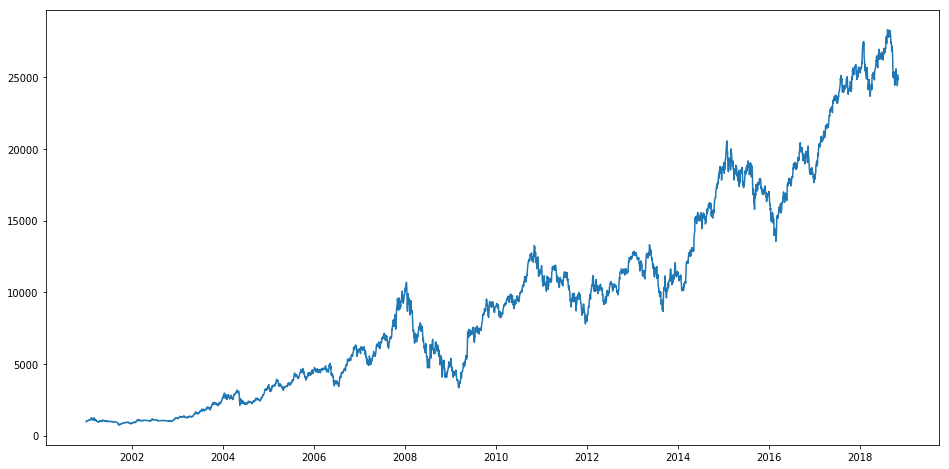

In [3]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [4]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [5]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
#splitting into train and validation
upto =len(new_data)-248

print(upto)
train = new_data[:upto]
valid = new_data[upto:]

4191


In [6]:
new_data.shape, train.shape, valid.shape

((4439, 1), (4191, 1), (248, 1))

In [7]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [8]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM






Using TensorFlow backend.


In [9]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [10]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
upto =len(new_data)-248
print(upto)
train = dataset[0:upto,:]
valid = dataset[upto:,:]

4191


In [12]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)-3):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i+3,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
one =np.reshape(x_train, (x_train.shape[0],x_train.shape[1]))
print(one.shape)
test_df = pd.DataFrame(one)
test_df["y"] = y_train

print(test_df.iloc[:,59:])

(4128, 60)
            59         y
0     0.010274  0.007853
1     0.010710  0.008223
2     0.010777  0.008208
3     0.008986  0.008149
4     0.007853  0.008386
5     0.008223  0.007989
6     0.008208  0.008483
7     0.008149  0.007965
8     0.008386  0.008785
9     0.007989  0.009943
10    0.008483  0.010879
11    0.007965  0.011170
12    0.008785  0.010727
13    0.009943  0.010777
14    0.010879  0.010653
15    0.011170  0.010641
16    0.010727  0.010753
17    0.010777  0.009184
18    0.010653  0.009032
19    0.010641  0.009737
20    0.010753  0.009412
21    0.009184  0.010180
22    0.009032  0.011042
23    0.009737  0.011198
24    0.009412  0.010788
25    0.010180  0.012043
26    0.011042  0.011446
27    0.011198  0.011864
28    0.010788  0.011593
29    0.012043  0.011485
...        ...       ...
4098  0.871799  0.881307
4099  0.873507  0.881113
4100  0.876425  0.878339
4101  0.873961  0.872327
4102  0.881307  0.856719
4103  0.881113  0.849329
4104  0.878339  0.850566
4105  0.872327

In [13]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 969s - loss: 7.6133e-04


In [24]:
closing_price

array([[24016.998],
       [24163.777],
       [24288.727],
       [24425.832],
       [24522.613],
       [24535.164],
       [24493.92 ],
       [24460.553],
       [24474.072],
       [24474.201],
       [24458.598],
       [24428.678],
       [24443.258],
       [24522.719],
       [24616.824],
       [24697.215],
       [24759.057],
       [24795.639],
       [24823.81 ],
       [24863.691],
       [24890.117],
       [24897.703],
       [24809.088],
       [24680.346],
       [24539.074],
       [24430.742],
       [24303.537],
       [24237.238],
       [24254.32 ],
       [24313.912],
       [24325.781],
       [24297.582],
       [24291.62 ],
       [24343.67 ],
       [24433.91 ],
       [24543.436],
       [24614.34 ],
       [24651.348],
       [24685.59 ],
       [24715.094],
       [24702.54 ],
       [24677.58 ],
       [24661.443],
       [24608.957],
       [24559.94 ],
       [24517.172],
       [24512.97 ],
       [24549.242],
       [24607.21 ],
       [24667.424],


In [25]:
len(valid)

248

In [91]:
no_days =3
valid = new_data[upto:]
val =len(new_data[upto:])
#valid = new_data[upto+3:]
valid = valid.iloc[3:val+1]
print(valid.shape)
print(closing_price[:len(closing_price)-3].shape)
valid['Predictions'] =0
valid['Predictions'] = closing_price[:len(closing_price)-3]
#print(valid.shape)
valid
      

(245, 1)
(245, 1)


,Close,Predictions
Date,,
2017-11-06,25571.2,24016.998047
2017-11-07,25300.8,24163.777344
2017-11-08,25184.3,24288.726562
2017-11-09,25291.3,24425.832031
2017-11-10,25499,24522.613281
2017-11-13,25358.3,24535.164062
2017-11-14,25284.6,24493.919922
2017-11-15,25218.9,24460.552734
2017-11-16,25446.6,24474.072266


In [101]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(valid['Predictions'])),2)))
rms

1073.3158092459125

In [93]:
valid.columns



Index(['Close', 'Predictions'], dtype='object')

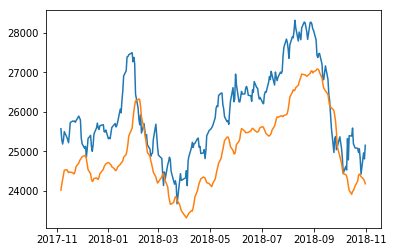

In [99]:
#for plotting
#dataset = new_data.values
#upto =len(new_data)-248
#print(upto)
#train = new_data[:upto]
#valid = new_data[upto:]

#plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


In [100]:
from keras.models import model_from_json
import os
symbol = "BANKNIFTY_3"

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(symbol+".h5")
print("Saved model to disk")


Saved model to disk


Loaded model from disk
248
[[0.8661857 ]
 [0.87174445]
 [0.8762631 ]
 [0.88129187]
 [0.8846502 ]
 [0.88469106]
 [0.88282126]
 [0.88152766]
 [0.882222  ]
 [0.8822775 ]
 [0.8816934 ]
 [0.8805576 ]
 [0.8812751 ]
 [0.8845175 ]
 [0.88813037]
 [0.8910566 ]
 [0.89321035]
 [0.8943795 ]
 [0.8952969 ]
 [0.89675266]
 [0.8976589 ]
 [0.8978419 ]
 [0.8941836 ]
 [0.88918823]
 [0.88389844]
 [0.8800681 ]
 [0.87542194]
 [0.87328666]
 [0.87437445]
 [0.8768923 ]
 [0.877229  ]
 [0.8759675 ]
 [0.87572604]
 [0.87783206]
 [0.8813372 ]
 [0.88547003]
 [0.8879197 ]
 [0.88905776]
 [0.89020294]
 [0.8912152 ]
 [0.8905633 ]
 [0.88954693]
 [0.8889752 ]
 [0.88693565]
 [0.8851426 ]
 [0.8836269 ]
 [0.88366973]
 [0.885243  ]
 [0.8875383 ]
 [0.88979846]
 [0.8908916 ]
 [0.89173484]
 [0.8929329 ]
 [0.8964086 ]
 [0.89899975]
 [0.9032801 ]
 [0.90892285]
 [0.91658086]
 [0.92409176]
 [0.9326009 ]
 [0.9394403 ]
 [0.94462293]
 [0.9484724 ]
 [0.94920504]
 [0.94973075]
 [0.9487247 ]
 [0.94160724]
 [0.9317545 ]
 [0.92097795]
 [0.911